### Write your name here
### This HW is due on  11/10 at 11:59 pm


We will use Iris data found here https://archive.ics.uci.edu/ml/datasets/Iris. It is one of the most used data set in data science. You can just google or read more about it here https://en.wikipedia.org/wiki/Iris_flower_data_set

 Let's load the data. The problem here is to classify which kind of flower it is with the values of 4 columns sepal length, sepal width, petal length and petal width. This data set has three labels: setosa, verginica and versicolor. We will use kNN and Logistic regression to classify this data in various ways.

In [56]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as st
import matplotlib.colors as colors
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [57]:
iris = pd.read_csv('iris.csv')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Find out how many labels the column species have.

In [58]:
iris.species.value_counts().to_frame()

,species
versicolor,50
setosa,50
virginica,50


## Problem 1
Train the kNN model with k = 4, x as the first 4 columns and y as the last column from the iris data.
Predict using x and find out the accuracy. Print out the confusion matrix and calculate the accuracy using confusion matrix. Explain here how many of which label were misclassified. Finally use seaborn package to plot a heat map of confusion matrix with appropriate labels. For an example of a code for heat map, read section 8.4 from our text book at zybook. ( 20 points)

In [59]:
L = list(iris.columns)[0:4]
x = iris[L]
x.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [62]:
L1 = list(iris.columns)[4]
y = iris[L1]
y.head(3)

0    setosa
1    setosa
2    setosa
Name: species, dtype: object

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [75]:
iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [76]:
metrics.accuracy_score(y_kmeans, iris.species)

0.96

In [77]:
metrics.confusion_matrix(y_kmeans, iris.species)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

versicolor had 0 predicted to be setosa and 0 predicted to be virginica
setosa had 0 predicted to be versicolor and 3 to be virginica
virginica had 0 predicted be versicolor and 3 predicted to be setosa

In [82]:
pairdf = x

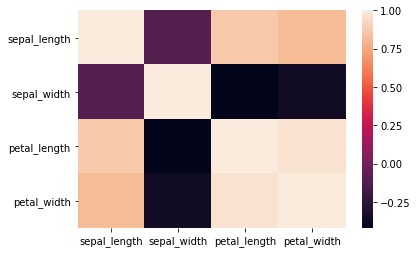

In [83]:
corr = pairdf.corr(method='pearson')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Problem 2
Logistic Regression with multiclass option can be used for the classification problem that has more than 2 labels. Train a logistic Regression model with x and y data above and report your accuracy. Prove that this accuracy is correct by calculating using the confusion matrix. Like in problem 1, explain how many of which labels were predicted wrong. Finally use seaborn package to plot a heat map of confusion matrix with appropriate labels. (20 points)

In [84]:
Logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial') 
#for logistic model. Everything else is same as in previous HW.

In [85]:
Logreg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
ypredlr = Logreg.predict(x)
print("Accuracy:",metrics.accuracy_score(y, ypredlr))
print(confusion_matrix(y, ypredlr))

Accuracy: 0.9733333333333334
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


This accuracy holds true because out of all 150 flowers, only a few were mislabeled, and that is the species setosa that had 3 misclassified as virginica, and 1 virginica that was misclassified as a setosa.

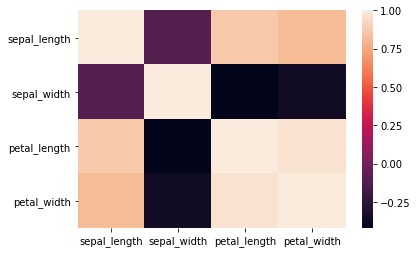

In [87]:
pairdf = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
corr = pairdf.corr(method='pearson')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Problem 3
Use k =6 to k=15 to train 10 kNN models using x and y data and pick the optimal k that gives the best accuracy. Report your accuracy and the confusion matrix. For this, you can either train 10 models and check accuracy one by one or follow ideas from here and apply it using a for loop. https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset. (20 points)

In [89]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.9733333333333334

In [90]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.9733333333333334

In [91]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.98

In [92]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.98

In [93]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.98

In [94]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.9733333333333334

In [95]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.98

In [96]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.98

In [97]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.98

In [98]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x, y)
y_kmeans = knn.predict(x)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.9866666666666667

In [99]:
metrics.confusion_matrix(y_kmeans, iris.species)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

the above model with k = 15 is the most accurate, with only 2 flowers being misclassified

### Problem 4
Use test train method with (75, 25) rule to split the data. Use the optimal k you found in problem 3 to train a kNN model. Report your testing and training accuracy with their confusion matrices. (20 points)

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
y_kmeans = knn.predict(x_train)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, y_train)

0.9821428571428571

In [102]:
metrics.confusion_matrix(y_kmeans, y_train)

array([[35,  0,  0],
       [ 0, 38,  0],
       [ 0,  2, 37]], dtype=int64)

In [103]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_test, y_test)
y_kmeans = knn.predict(x_test)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, y_test)

0.9210526315789473

In [104]:
metrics.confusion_matrix(y_kmeans, y_test)

array([[15,  0,  0],
       [ 0,  9,  2],
       [ 0,  1, 11]], dtype=int64)

### Problem 5
Standardization of data refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one so that all the atributes can be measued using a same scale. Read more here https://stackoverflow.com/questions/52904713/why-we-need-standardization-and-normalization-in-machine-learning.
Now, standardize the data you have in problem 4 and rerun your kNN model  in  problem 4. Check to see if it improves your training and testing accuracy. Report confusion matrices also. Section 8.4 in zybook has an example on how to standardize.
(20 points)

In [106]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_scaled, y)
y_kmeans = knn.predict(x_scaled)
y_kmeans

iris['species'].replace('setosa', 0, inplace = True)
iris['species'].replace('versicolor', 1, inplace = True)
iris['species'].replace('virginica', 2, inplace = True)
np.array(iris.species)

metrics.accuracy_score(y_kmeans, iris.species)

0.9666666666666667

does not improve our data accuracy

In [108]:
metrics.confusion_matrix(y_kmeans, iris.species)

array([[50,  0,  0],
       [ 0, 49,  4],
       [ 0,  1, 46]], dtype=int64)